In [2]:
!pip install yfinance

     |████████████████████████████████| 63 kB 943 kB/s 
     |████████████████████████████████| 6.4 MB 10.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%load_ext autoreload
%autoreload 2
import yfinance as yf
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from google.colab import files

import sys
sys.path.append("/content/drive/MyDrive/ML_Stock")

nb_path = '/content/drive/MyDrive/ML_Stock/'
#!pip install --target=$nb_path --upgrade yfinance

from Model import Model
from Stock import Stock



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
name = "AAPL"
data = yf.download(tickers = name,period = '500d')


[*********************100%***********************]  1 of 1 completed


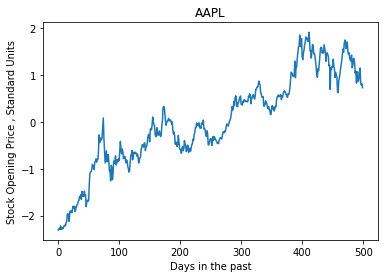

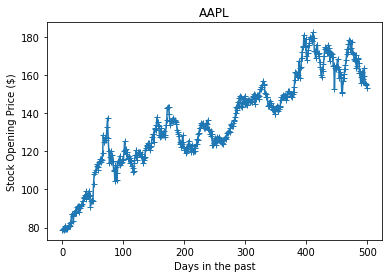

In [26]:
#plt.plot(data['Open'])

arr = np.array(data['Open'])
X = (arr - arr.mean())/arr.std()
plt.title(name)
plt.xlabel("Days in the past") #re-write this to be dates
plt.ylabel("Stock Opening Price , Standard Units")
plt.plot(X)
plt.show()

arr = np.array(data['Open'])
X = (arr - arr.mean())/arr.std()
plt.title(name)
plt.xlabel("Days in the past") #re-write this to be dates
plt.ylabel("Stock Opening Price ($)")
plt.plot(arr,"-+")

In [50]:
stck = Stock(arr,3,epochs = 5000, stockname = "COKE",theta = [256,256],lookahead = 50,lookback_interval = 50,lookbacks = 1,batch_size = 1)


In [8]:
#arr2 = stck.get_moving_average(window = 7)

In [51]:
stck.run()

Model 1 of 3 trained
Model 2 of 3 trained
Model 3 of 3 trained


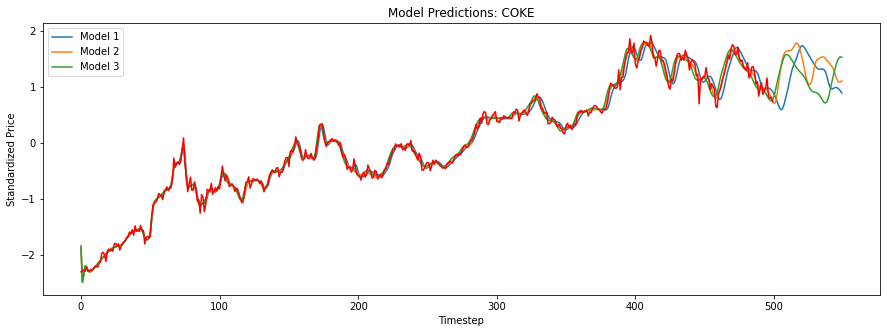

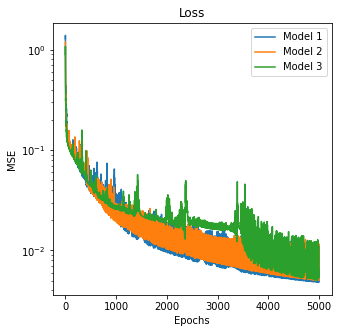

In [52]:
stck.plot_predictions(in_figsize = (15,5))
stck.plot_losses()

In [44]:
stck.train_test(val_start = 50,epochs = 5000)

Model 1 of 4 trained
Model 2 of 4 trained
Model 3 of 4 trained
Model 4 of 4 trained


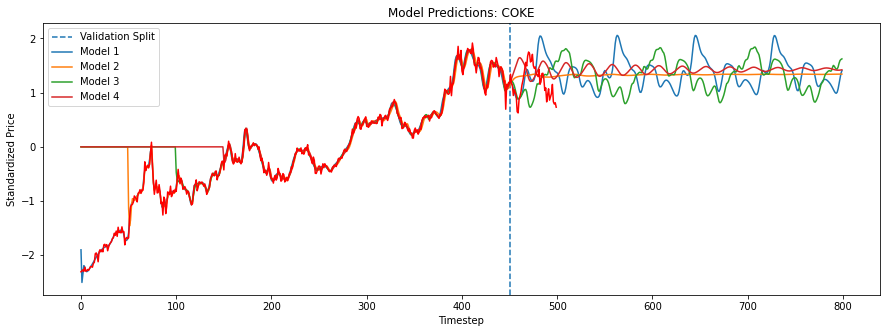

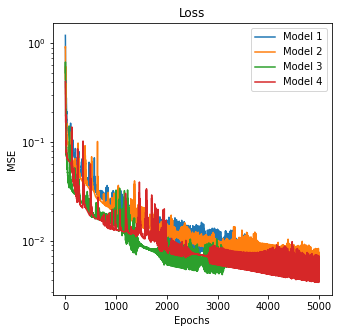

In [48]:
stck.plot_predictions(in_figsize = (15,5),test = 50)
stck.plot_losses()